**Import Libraries**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
plt.style.use('fivethirtyeight')

Lets Load Data

In [2]:
#import dataset
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

The first dataset contains the following features:-

- movie_id - A unique identifier for each movie.<br>
- cast - The name of lead and supporting actors.<br>
- crew - The name of Director, Editor, Composer, Writer etc.<br>

The second dataset has the following features:-<br>

- budget - The budget in which the movie was made.<br>
- genre - The genre of the movie, Action, Comedy ,Thriller etc.<br>
- homepage - A link to the homepage of the movie.<br>
- id - This is infact the movie_id as in the first dataset.<br>
- keywords - The keywords or tags related to the movie.<br>
- original_language - The language in which the movie was made.<br>
- original_title - The title of the movie before translation or adaptation.<br>
- overview - A brief description of the movie.<br>
- popularity - A numeric quantity specifying the movie popularity.<br>
- production_companies - The production house of the movie.<br>
- production_countries - The country in which it was produced.<br>
- release_date - The date on which it was released.<br>
- revenue - The worldwide revenue generated by the movie.<br>
- runtime - The running time of the movie in minutes.<br>
- status - "Released" or "Rumored".<br>
- tagline - Movie's tagline.<br>
- title - Title of the movie.<br>
- vote_average - average ratings the movie recieved.<br>
- vote_count - the count of votes recieved.<br>

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


We will be Droping the columns which is not required in the dataset

In [4]:
#drop features which are not required
movies.drop(['homepage' , 'production_companies' , 'production_countries' , 'spoken_languages'] , axis=1 , inplace=True)

In [5]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**Lets Merge the two datasets.**

In [7]:
credits.rename(columns={'movie_id':'id'} , inplace=True)
credits.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
credits.columns = ['id' ,'tittle' , 'cast' , 'crew']
movies = movies.merge(credits, on='id')
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'tittle', 'cast', 'crew'],
      dtype='object')

# Data Wrangling

In [9]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
#it shows the information of features like if it conatins any null value or what is the data type of that feature
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 19 columns):
budget               4803 non-null int64
genres               4803 non-null object
id                   4803 non-null int64
keywords             4803 non-null object
original_language    4803 non-null object
original_title       4803 non-null object
overview             4800 non-null object
popularity           4803 non-null float64
release_date         4802 non-null object
revenue              4803 non-null int64
runtime              4801 non-null float64
status               4803 non-null object
tagline              3959 non-null object
title                4803 non-null object
vote_average         4803 non-null float64
vote_count           4803 non-null int64
tittle               4803 non-null object
cast                 4803 non-null object
crew                 4803 non-null object
dtypes: float64(3), int64(4), object(12)
memory usage: 750.5+ KB


In [11]:
# finding out if there is any null value
movies.isnull().sum()

budget                 0
genres                 0
id                     0
keywords               0
original_language      0
original_title         0
overview               3
popularity             0
release_date           1
revenue                0
runtime                2
status                 0
tagline              844
title                  0
vote_average           0
vote_count             0
tittle                 0
cast                   0
crew                   0
dtype: int64

In [12]:
# drop the columns which is not required
movies.drop(['tagline','tittle', 'original_title'],axis=1,inplace=True)

In [13]:
movies.head()

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
#drop all the rows with NaN values
movies = movies.dropna()

In [15]:
#check if any null value 
movies.isnull().sum()

budget               0
genres               0
id                   0
keywords             0
original_language    0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
title                0
vote_average         0
vote_count           0
cast                 0
crew                 0
dtype: int64

(-58000000.0, 98800000.0, 39200000.0)

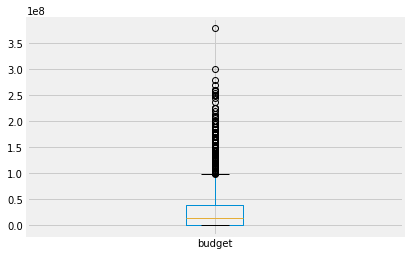

In [16]:
# box plot to check outliers for budget
movies.boxplot('budget')
IQR = movies.budget.quantile(0.75)-movies.budget.quantile(0.25)
lower_fence1 = movies.budget.quantile(0.25) - (IQR*1.5)
higher_fence1 = movies.budget.quantile(0.75) + (IQR*1.5)
lower_fence1,higher_fence1,IQR

(-139434778.5, 232391297.5, 92956519.0)

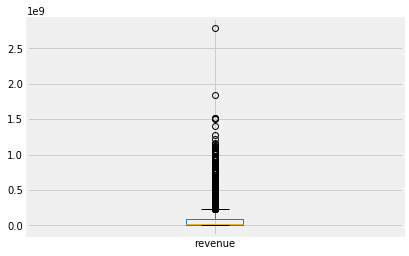

In [17]:
#box plot to check outlier for revenue
movies.boxplot('revenue')
IQR = movies.revenue.quantile(0.75)-movies.revenue.quantile(0.25)
lower_fence = movies.revenue.quantile(0.25) - (IQR*1.5)
higher_fence = movies.revenue.quantile(0.75) + (IQR*1.5)
lower_fence,higher_fence,IQR

In [18]:
#remove outlier by the higher value of budget and revenue
movies.loc[movies.budget >= higher_fence1 , 'budget'] = higher_fence1
movies.loc[movies.revenue >= higher_fence , 'revenue'] = higher_fence

(-139434778.5, 232391297.5, 92956519.0)

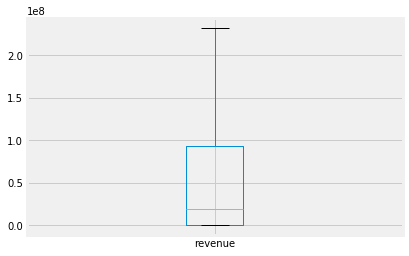

In [19]:
#check to if outlier still exist 
movies.boxplot('revenue')
IQR = movies.revenue.quantile(0.75)-movies.revenue.quantile(0.25)
lower_fence = movies.revenue.quantile(0.25) - (IQR*1.5)
higher_fence = movies.revenue.quantile(0.75) + (IQR*1.5)
lower_fence,higher_fence,IQR

(-58000000.0, 98800000.0, 39200000.0)

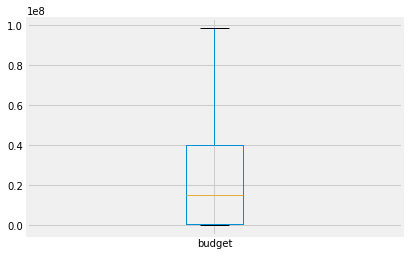

In [20]:
#check to if outlier still exist
movies.boxplot('budget')
IQR = movies.budget.quantile(0.75)-movies.budget.quantile(0.25)
lower_fence1 = movies.budget.quantile(0.25) - (IQR*1.5)
higher_fence1 = movies.budget.quantile(0.75) + (IQR*1.5)
lower_fence1,higher_fence1,IQR

In [21]:
from ast import literal_eval
features = ['genres' , 'cast', 'keywords' , 'crew']

for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [22]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [23]:
def get_list(x):
    if isinstance(x , list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [24]:
features = ['genres' , 'cast' , 'keywords']
movies['director'] = movies['crew'].apply(get_director)

for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [25]:
df1 = movies.copy()

In [26]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [27]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df1[feature] = df1[feature].apply(clean_data)

In [28]:
df1.head()

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,director
0,98800000.0,"[action, adventure, fantasy]",19995,"[cultureclash, future, spacewar]",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,232391297.5,162.0,Released,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron
1,98800000.0,"[adventure, fantasy, action]",285,"[ocean, drugabuse, exoticisland]",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,232391297.5,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski
2,98800000.0,"[action, adventure, crime]",206647,"[spy, basedonnovel, secretagent]",en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,232391297.5,148.0,Released,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes
3,98800000.0,"[action, crime, drama]",49026,"[dccomics, crimefighter, terrorist]",en,Following the death of District Attorney Harve...,112.312950,2012-07-16,232391297.5,165.0,Released,The Dark Knight Rises,7.6,9106,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan
4,98800000.0,"[action, adventure, sciencefiction]",49529,"[basedonnovel, mars, medallion]",en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,232391297.5,132.0,Released,John Carter,6.1,2124,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton


In [29]:
movies.drop(columns='crew' , axis = 1 , inplace=True)

In [30]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df1['soup'] = df1.apply(create_soup, axis=1)

In [31]:
# append the soup to movies dataframe
movies = movies.join(df1['soup'])

In [32]:
#unstack genres
s = movies.apply(lambda x : pd.Series(x['genres']) , axis = 1)
s.columns = ['genres1' , 'genres2' , 'genres3']
s.name = 'genres'
movies = movies.drop('genres' , axis=1).join(s)

In [33]:
#unstack cast

s = movies.apply(lambda x: pd.Series(x['cast']), axis = 1)
s.columns = ['cast1' , 'cast2' , 'cast3']
movies = movies.drop('cast' , axis = 1).join(s)

In [34]:
#unstack cast

s = movies.apply(lambda x: pd.Series(x['keywords']), axis = 1)
s.columns = ['keywords1' , 'keywords2' , 'keywords3']
movies = movies.drop('keywords' , axis = 1).join(s)

## EDA

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


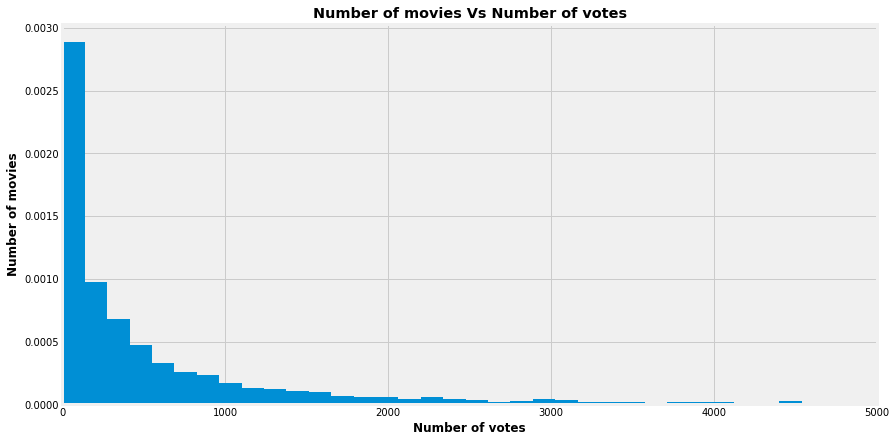

In [35]:
#no. of votes

movies.vote_count
plt.figure(figsize=(13,7))
plt.hist(x = movies['vote_count'] , bins = 100 , normed=True)
plt.xlabel('Number of votes', weight = 'bold' )
plt.ylabel('Number of movies' , weight = 'bold')
plt.title('Number of movies Vs Number of votes' , weight = 'bold')
plt.xlim(0,5000)
plt.show()

### 1.Movies With Best Vote Average

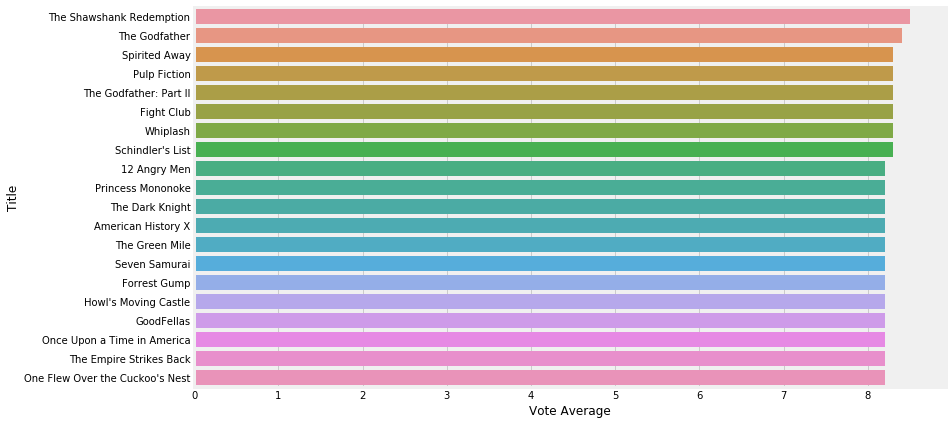

In [36]:
data = movies[['title' , 'vote_average' , 'vote_count']]
data = data[data['vote_count'] >= 250]
data = data.sort_values('vote_average' , ascending = False).nlargest(20 , columns = 'vote_average')
plt.figure(figsize=(12,7))
sns.barplot(x = 'vote_average' , y = 'title' , data = data)
plt.xlabel('Vote Average')
plt.ylabel('Title')
plt.show()

## 2. Movies with highest Vote Count

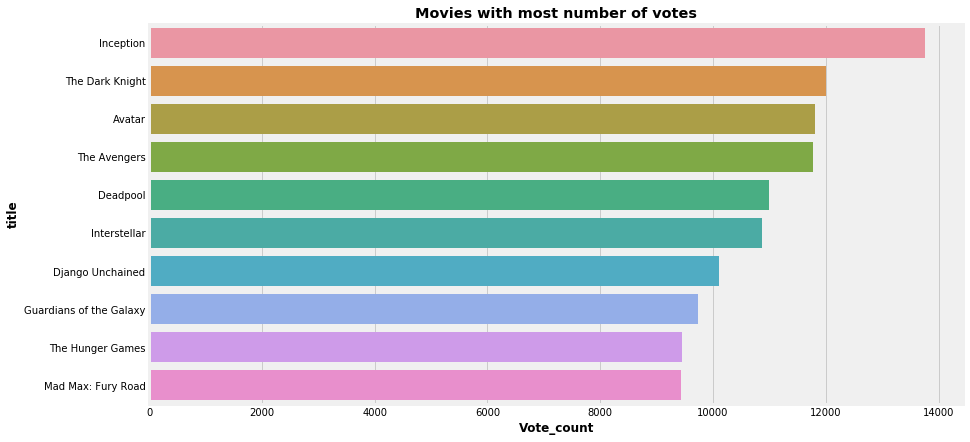

<Figure size 432x288 with 0 Axes>

In [37]:
data = movies[['title' , 'vote_count']]
data = data.sort_values('vote_count' , ascending = False).nlargest(10 , columns = 'vote_count')
plt.figure(figsize=(13,7))
sns.barplot(data = data , x = 'vote_count' , y = 'title')
plt.xlabel('Vote_count' , weight = 'bold')
plt.ylabel('title' , weight = 'bold')
plt.title('Movies with most number of votes' , weight = 'bold')
plt.show()
plt.savefig('Movies with most number of votes')

In [38]:
data = movies[['budget' , 'title']]
data.rename(columns = {'original_title' : 'movie_title'} , inplace = True)
data = data.sort_values('budget' , ascending=False).head(10)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


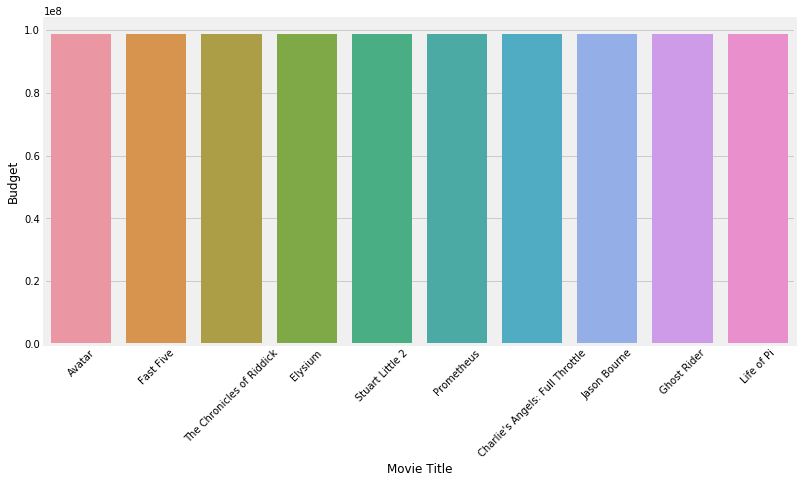

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'title' , y = 'budget' , data=data)
plt.xlabel('Movie Title')
plt.ylabel('Budget')
plt.xticks(rotation = 45)
plt.show()

## Most Popular Movie

In [40]:
data = movies[["popularity" , 'title']]
data.head()

,popularity,title
0,150.437577,Avatar
1,139.082615,Pirates of the Caribbean: At World's End
2,107.376788,Spectre
3,112.312950,The Dark Knight Rises
4,43.926995,John Carter


In [41]:
data = data.sort_values('popularity' , ascending=False).head(10)
data

,popularity,title
546,875.581305,Minions
95,724.247784,Interstellar
788,514.569956,Deadpool
94,481.098624,Guardians of the Galaxy
127,434.278564,Mad Max: Fury Road
28,418.708552,Jurassic World
199,271.972889,Pirates of the Caribbean: The Curse of the Bla...
82,243.791743,Dawn of the Planet of the Apes
200,206.227151,The Hunger Games: Mockingjay - Part 1
88,203.734590,Big Hero 6


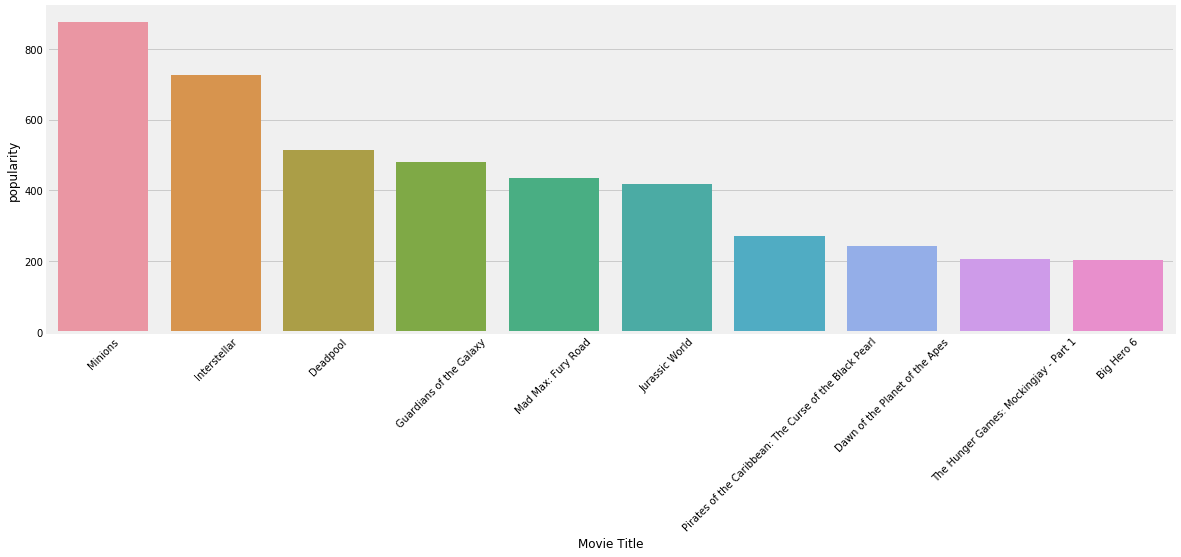

In [42]:
plt.figure(figsize=(18,6))
sns.barplot(x = 'title' , y='popularity' , data =data)

plt.xlabel('Movie Title')
plt.ylabel("popularity")
plt.xticks(rotation = 45)
plt.show()

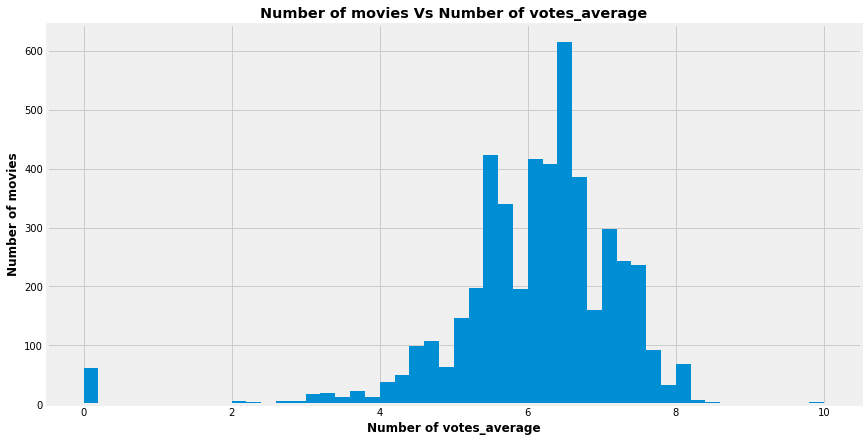

In [43]:
#no. of votes
movies.vote_average
plt.figure(figsize=(13,7))
plt.hist(x = movies['vote_average'] , bins = 50)
plt.xlabel('Number of votes_average', weight = 'bold' )
plt.ylabel('Number of movies' , weight = 'bold')
plt.title('Number of movies Vs Number of votes_average' , weight = 'bold')
plt.show()

## Movies with most number of vote Average 

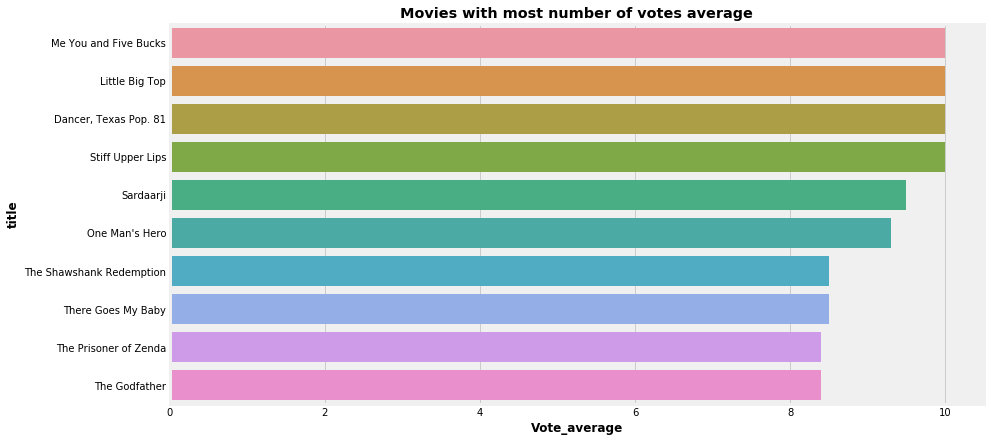

<Figure size 432x288 with 0 Axes>

In [44]:
data = movies[['title' , 'vote_average']]
data = data.sort_values('vote_average' , ascending = False).nlargest(10 , columns = 'vote_average')
plt.figure(figsize=(13,7))
sns.barplot(data = data , x = 'vote_average' , y = 'title')
plt.xlabel('Vote_average' , weight = 'bold')
plt.ylabel('title' , weight = 'bold')
plt.title('Movies with most number of votes average' , weight = 'bold')
plt.show()
plt.savefig('Movies with most number of votes Average')

Text(0, 0.5, 'genres')

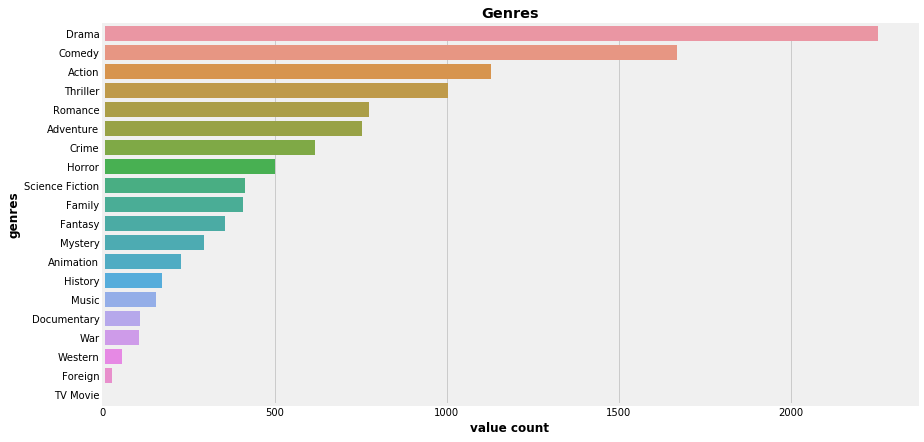

In [45]:
#genres

data = movies[['genres1' , 'genres2' , 'genres3']].stack().value_counts().reset_index()
data.columns = ['genres' , 'count']
plt.figure(figsize=(13,7))
sns.barplot(data=data , x = 'count' , y = 'genres')
plt.title('Genres' , weight = 'bold')
plt.xlabel('value count' , weight = 'bold')
plt.ylabel('genres' , weight = 'bold')

Text(0, 0.5, 'Actor')

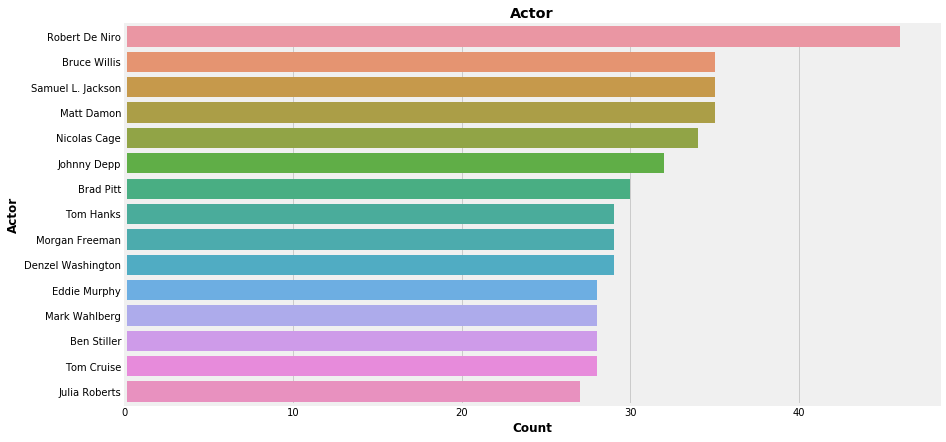

In [46]:
# Actor with most Apperence

df = movies[['cast1' , 'cast2' , 'cast3']].stack().value_counts().reset_index().head(15)
df.columns = ['Actor' , 'value_count']
plt.figure(figsize=(13,7))
sns.barplot(data=df , x = 'value_count' , y = 'Actor')
plt.title('Actor' , weight = 'bold')
plt.xlabel('Count' , weight = 'bold')
plt.ylabel('Actor' , weight = 'bold')

Text(0, 0.5, 'Director')

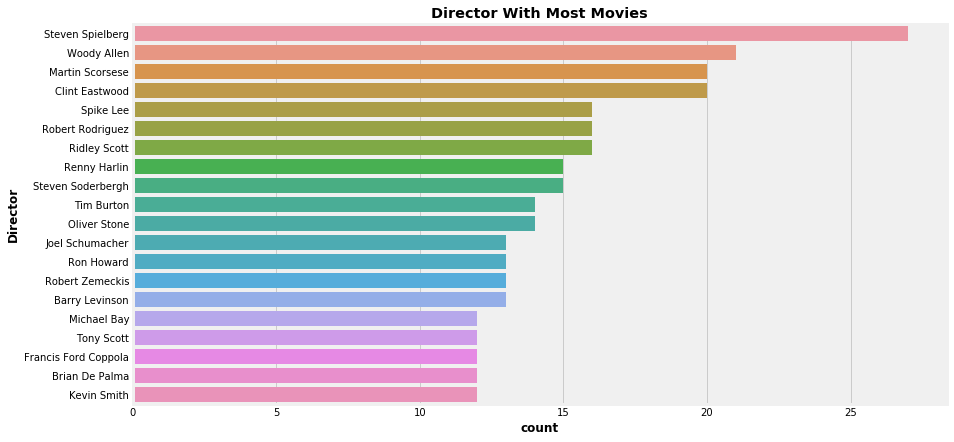

In [47]:
#Dicrector with most movies

df1 = movies.director.value_counts().reset_index().head(20)
df1.columns = ['Director' , 'val_count']
plt.figure(figsize=(13,7))
sns.barplot(data=df1 , x = 'val_count' , y = 'Director')
plt.title('Director With Most Movies' , weight = 'bold')
plt.xlabel('count' , weight = 'bold')
plt.ylabel('Director' , weight = 'bold')

In [48]:
movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,soup,genres1,genres2,genres3,cast1,cast2,cast3,keywords1,keywords2,keywords3
0,98800000.0,19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,232391297.5,162.0,Released,Avatar,...,cultureclash future spacewar samworthington zo...,Action,Adventure,Fantasy,Sam Worthington,Zoe Saldana,Sigourney Weaver,culture clash,future,space war
1,98800000.0,285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,232391297.5,169.0,Released,Pirates of the Caribbean: At World's End,...,ocean drugabuse exoticisland johnnydepp orland...,Adventure,Fantasy,Action,Johnny Depp,Orlando Bloom,Keira Knightley,ocean,drug abuse,exotic island
2,98800000.0,206647,en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,232391297.5,148.0,Released,Spectre,...,spy basedonnovel secretagent danielcraig chris...,Action,Adventure,Crime,Daniel Craig,Christoph Waltz,Léa Seydoux,spy,based on novel,secret agent
3,98800000.0,49026,en,Following the death of District Attorney Harve...,112.312950,2012-07-16,232391297.5,165.0,Released,The Dark Knight Rises,...,dccomics crimefighter terrorist christianbale ...,Action,Crime,Drama,Christian Bale,Michael Caine,Gary Oldman,dc comics,crime fighter,terrorist
4,98800000.0,49529,en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,232391297.5,132.0,Released,John Carter,...,basedonnovel mars medallion taylorkitsch lynnc...,Action,Adventure,Science Fiction,Taylor Kitsch,Lynn Collins,Samantha Morton,based on novel,mars,medallion


Text(0, 0.5, 'keywords')

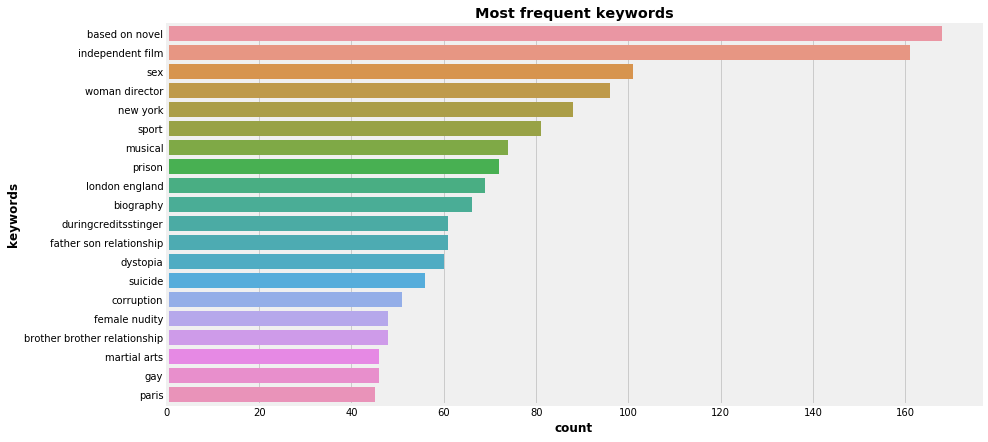

In [49]:
#keywords
df2 = movies[['keywords1' , 'keywords2' , 'keywords3']].stack().value_counts().reset_index().head(20)
df2.columns = ['keywords' , 'val_count']
plt.figure(figsize=(13,7))
sns.barplot(data=df2 , x = 'val_count' , y = 'keywords')
plt.title('Most frequent keywords' , weight = 'bold')
plt.xlabel('count' , weight = 'bold')
plt.ylabel('keywords' , weight = 'bold')

## Weighted Average

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.<br>
So, I'll be using IMDB's weighted rating (wr) which is given as :-

where,
    ![](wr.png)

v is the number of votes for the movie;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the movie; And<br>
C is the mean vote across the whole report<br>
We already have v(vote_count) and R (vote_average) and C can be calculated as<br>

In [50]:
m = movies['vote_count'].quantile(0.7)
C = movies['vote_average'].mean()

In [51]:
def weighted_average(x=movies , m = m , C = C):
    v = x['vote_count']
    R = x['vote_average']
    
    return (((v*R) + (m*C)) / (v+m))

In [52]:
movies['weighted_average'] = movies.apply(weighted_average , axis = 1)

Sort movies on **Weighted-Average**

In [53]:
movies_sorted = movies.sort_values('weighted_average' , ascending = False)
movies_sorted = movies_sorted[['title' , 'vote_count' , 'vote_average' , 'weighted_average' , 'popularity']].head(20)
movies_sorted

,title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340909,136.747729
3337,The Godfather,5893,8.4,8.193068,143.659698
662,Fight Club,9413,8.3,8.171765,146.757391
3232,Pulp Fiction,8428,8.3,8.157745,121.463076
65,The Dark Knight,12002,8.2,8.102767,187.322927
809,Forrest Gump,7927,8.2,8.056197,138.133331
1818,Schindler's List,4329,8.3,8.038986,104.469351
3865,Whiplash,4254,8.3,8.034937,192.528841
96,Inception,13752,8.1,8.018693,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010607,78.517830


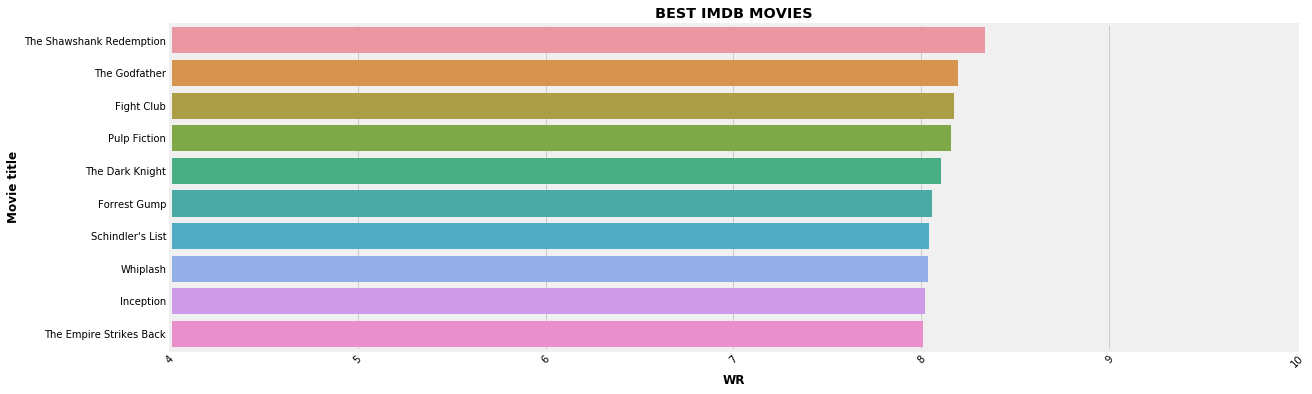

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(18,6))
plt.xlim(4,10)
sns.barplot(x = 'weighted_average' , y='title' , data =movies_sorted.head(10))
plt.title("BEST IMDB MOVIES" , weight = 'bold')
plt.xlabel('WR' ,weight = 'bold' )
plt.ylabel("Movie title" , weight = 'bold')
plt.xticks(rotation = 45)
plt.show()
plt.savefig('best_imdb_movies.png')

**Popularity**

In [55]:
popularity = movies_sorted[['popularity' , 'title']]
popularity = popularity.sort_values('popularity' , ascending = False).head(10)
popularity

,popularity,title
95,724.247784,Interstellar
3865,192.528841,Whiplash
65,187.322927,The Dark Knight
96,167.583710,Inception
662,146.757391,Fight Club
3337,143.659698,The Godfather
809,138.133331,Forrest Gump
262,138.049577,The Lord of the Rings: The Fellowship of the Ring
1881,136.747729,The Shawshank Redemption
2912,126.393695,Star Wars


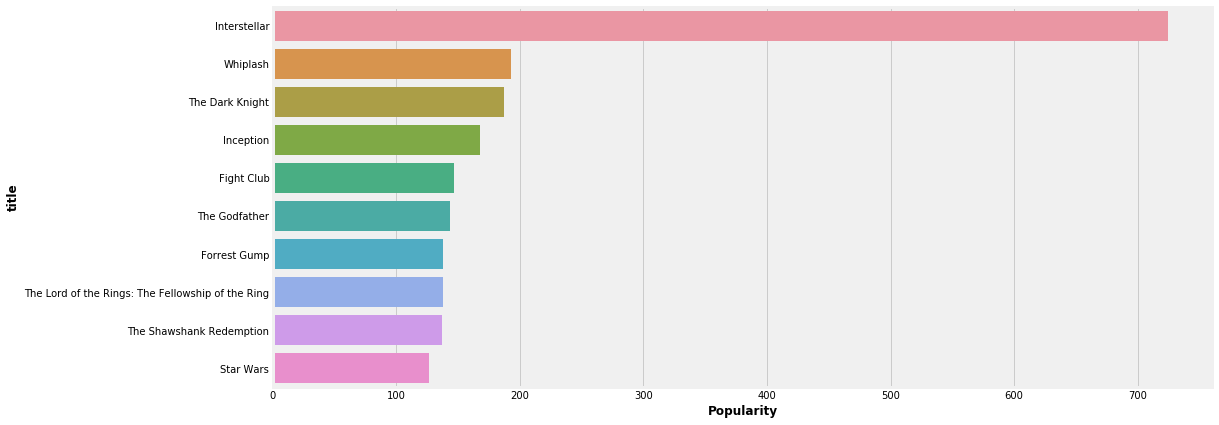

In [56]:
plt.figure(figsize=(15,7))
sns.barplot(data = popularity , x = 'popularity' , y = 'title')
plt.xlabel('Popularity' , weight= 'bold')
plt.ylabel('title' , weight = 'bold')
plt.savefig('best_popular_movies.png')
plt.show()

## Content Based Recommendation System

They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

In [57]:
movies['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

we need to compute Tf-idf (Term frequency - inverse document frequency) for each overview to convert it into a word vector.<br>
<br>
Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (**term instances/total instances**). Inverse Document Frequency is the relative count of documents containing the term is given as **log(number of documents/documents with term**).The overall importance of each word to the documents in which they appear is equal to TF * IDF

Suppose you want to summarize a document or a paragraph using few keywords.<br><br>

One technique is to pick the most frequently occurring terms (words with high term frequency or tf). However, the most frequent word is a less useful metric since some words like 'this', 'a'  occur very frequently across all documents.

Hence, we also want a measure of how unique a word is i.e. how infrequently the word occurs across all documents (inverse document frequency or idf).

Hence, the product of tf x idf (tfidf) of a word gives a product of how frequent this word is in the document multiplied by how unique the word is w.r.t. the entire corpus of documents.

Words in the document with a high tfidf score occur frequently in the document and provide the most information about that specific document.

In [58]:
#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english' , min_df=3 , strip_accents='unicode' , ngram_range=(1,3))
tfidf_matrix = tfidf.fit_transform(movies['overview'].fillna(''))
tfidf_matrix.shape

(4799, 9919)

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
                            ![](cosine.png)

In [59]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(tfidf_matrix , tfidf_matrix)
cosine_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02444275, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01623639, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02444275, 0.01623639, ..., 1.        , 0.01699334,
        0.00730581],
       [0.        , 0.        , 0.        , ..., 0.01699334, 1.        ,
        0.01209598],
       [0.        , 0.        , 0.        , ..., 0.00730581, 0.01209598,
        1.        ]])

In [60]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
#indices

In [61]:
idx = indices['The Dark Knight Rises']

In [62]:
def get_recommendation(title , cosine_similarity = cosine_similarity):
    idx = indices[title]
    score = list(enumerate(cosine_similarity[idx]))
    score = sorted(score , key = lambda x:x[1] , reverse = True)
    score = score[1:11]
    movie_index = [i[0] for i in score]
    movies = indices[movie_index]
    return movies

In [63]:
get_recommendation('The Dark Knight Rises')

title
Batman Forever                              299
The Dark Knight                              65
Batman                                     1359
Batman Returns                              428
Slow Burn                                  2507
Batman Begins                               119
JFK                                        1181
Batman: The Dark Knight Returns, Part 2    3854
Batman v Superman: Dawn of Justice            9
Batman & Robin                              210
dtype: int64

## MetaData based Recommendation

In [64]:
movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,genres1,genres2,genres3,cast1,cast2,cast3,keywords1,keywords2,keywords3,weighted_average
0,98800000.0,19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,232391297.5,162.0,Released,Avatar,...,Action,Adventure,Fantasy,Sam Worthington,Zoe Saldana,Sigourney Weaver,culture clash,future,space war,7.148108
1,98800000.0,285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,232391297.5,169.0,Released,Pirates of the Caribbean: At World's End,...,Adventure,Fantasy,Action,Johnny Depp,Orlando Bloom,Keira Knightley,ocean,drug abuse,exotic island,6.807857
2,98800000.0,206647,en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,232391297.5,148.0,Released,Spectre,...,Action,Adventure,Crime,Daniel Craig,Christoph Waltz,Léa Seydoux,spy,based on novel,secret agent,6.276307
3,98800000.0,49026,en,Following the death of District Attorney Harve...,112.312950,2012-07-16,232391297.5,165.0,Released,The Dark Knight Rises,...,Action,Crime,Drama,Christian Bale,Michael Caine,Gary Oldman,dc comics,crime fighter,terrorist,7.509685
4,98800000.0,49529,en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,232391297.5,132.0,Released,John Carter,...,Action,Adventure,Science Fiction,Taylor Kitsch,Lynn Collins,Samantha Morton,based on novel,mars,medallion,6.098751


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['soup'])


In [66]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix , count_matrix)

In [67]:
indices = pd.Series(movies.index , index = movies['title'])

In [68]:
get_recommendation('The Dark Knight Rises' , cosine_sim2)

title
The Dark Knight               65
Batman Begins                119
Amidst the Devil's Wings    4638
The Prestige                1196
Romeo Is Bleeding           3073
Black November              3326
Takers                      1503
Faster                      1986
Catwoman                     303
Gangster Squad               747
dtype: int64